Solution exist and Following are the assigned colours:


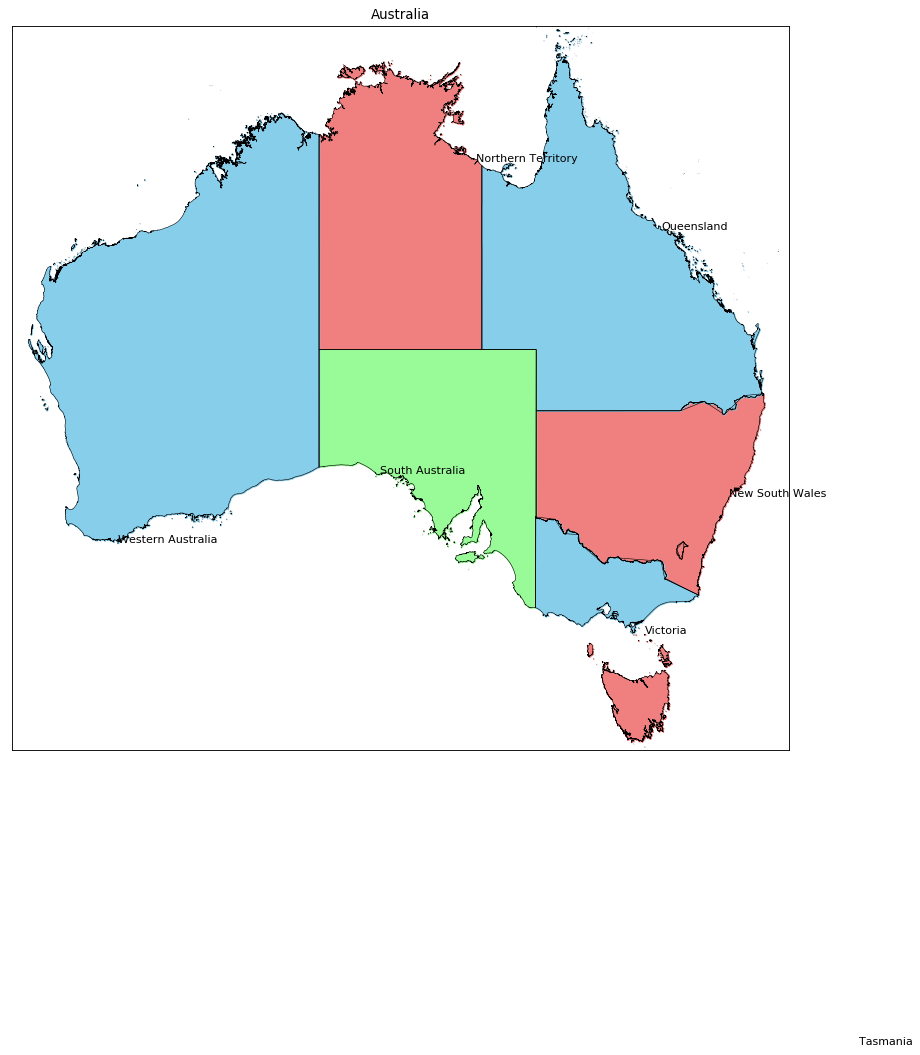

Time taken for execution: 13.581564903259277


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import random
import json
import time
from IPython import display
from matplotlib.collections import PatchCollection
import numpy as np
from scipy.spatial import ConvexHull
import time

#Backtracking Australia (Without heuristic)

# Python program for solution of M Coloring
# problem using backtracking

stateDictionary = {}
colorDictionary = {"1":"lightcoral", "2":"palegreen", "3":"skyblue"}
ResultDictionary = {}
DomainDictionary = {}


class Graph(): 

	def __init__(self, vertices): 
		self.V = vertices 
		self.graph = [[0 for column in range(vertices)]
							for row in range(vertices)] 

	## heuristic functions
	def MRV(self, domainDictionary, colours):
		LeastRemainingValuesStates = {0:[],1:[],2:[],3:[]}

		for key, value in domainDictionary.items():
			if len(value)==0 and colours[key-1] == 0:
				LeastRemainingValuesStates[0].append(key-1)

			elif(len(value)==1 and colours[key-1]==0):
				LeastRemainingValuesStates[1].append(key-1)

			elif(len(value)==2 and colours[key-1]==0):
				LeastRemainingValuesStates[2].append(key-1)

			elif(len(value)==3 and colours[key-1]==0):
				LeastRemainingValuesStates[3].append(key-1)

		if len(LeastRemainingValuesStates[0])>0:
			return LeastRemainingValuesStates[0]

		elif len(LeastRemainingValuesStates[1])>0:
			return LeastRemainingValuesStates[1]

		elif len(LeastRemainingValuesStates[2])>0:
			return LeastRemainingValuesStates[2]

		elif len(LeastRemainingValuesStates[3])>0:
			return LeastRemainingValuesStates[3]


	def DegreeConstraint(self, domainDictionary, colours):
		MaximumDegreeConstraint = 0
		MaximumDC_State = -1

		for v in range(self.V): 
			if colours[v]!=0:
				continue
			temp = 0
			for i in range(self.V):
				if self.graph[v][i] == 1:
					temp = temp + 1
			if temp > MaximumDegreeConstraint:
				MaximumDegreeConstraint = temp
				MaximumDC_State = v
		return MaximumDC_State


	def LCV(self, domainDictionary, colours):
		MinimumDegreeConstraint = 0
		MinimumDC_State = -1

		for v in range(self.V): 
			if colours[v]!=0:
				continue
			temp = 0
			for i in range(self.V):
				if self.graph[v][i] == 0:
					temp = temp + 1
			if temp > MinimumDegreeConstraint:
				MinimumDegreeConstraint = temp
				MinimumDC_State = v

		return MinimumDC_State

	def getTheNextState(self, domainDictionary, colours):
		if self.checkIfAllStatesColored(colours):
			return 0
		NextState = 0

		nextMRVStates = self.MRV(domainDictionary, colours)
		nextDCStates = self.DegreeConstraint(domainDictionary, colours)
		nextLCVStates = self.LCV(domainDictionary, colours)
		
		if (len(nextMRVStates)==1):
			NextState = nextMRVStates[0]
		elif(nextDCStates!=-1):
			NextState = nextDCStates
		else:
			NextState = nextLCVStates

		return NextState



	# A utility function to check if the current color assignment 
	# is safe for vertex v 
	def isSafe(self, v, colour, c): 
		for i in range(self.V): 
			if self.graph[v][i] == 1 and colour[i] == c: 
				return False
		return True
	
	def getTheNeighbors(self, state):
		listofneighbors = []
		for i in range(self.V):
			if self.graph[state][i] == 1:
				listofneighbors.append(i)
		return listofneighbors


	#singleton methods
	def checkIfAllStatesColored(self, colors):
		numberofvertices = 0

		for color in colors:
			if color != 0:
				numberofvertices = numberofvertices + 1

		# check if all states has been assigned.
		if numberofvertices == 7:
			return True
		else:
			return False

	# A recursive utility function to solve m 
	# coloring problem 
	def graphColourUtil(self, m, colour, v):
		try:
			if self.checkIfAllStatesColored(colour):
				return True
			if v == self.V:  ## just to check if we have reached 50th end state.
				return True

			if not DomainDictionary[v+1]: ## check if the domain has no colors in their domain variables. if it is empty return false
				return False

			for c in DomainDictionary[v+1]:
				if self.isSafe(v, colour, c) == True:
					colour[v] = c ## assign the color to that state
					neighbors = self.getTheNeighbors(v) ## get the neighbors of the current state.

					# code to remove colors in its neighboring states
					for neighbor in neighbors:
						if c in DomainDictionary[neighbor+1]:
							DomainDictionary[neighbor+1].remove(c) ## remove the color from the neighbor domain list

					Nextstate = self.getTheNextState(DomainDictionary, colour)
					if Nextstate != -1:
						if self.graphColourUtil(m, colour, Nextstate) == True:
							return True
					else:
						if self.graphColourUtil(m, colour, v+1) == True:
							return True

					# revert the domain values of all current neighbors
					for neighbor in neighbors:
						a = neighbor+1
						if c not in DomainDictionary[a]:
							DomainDictionary[a].append(c) ## remove the color from the neighbor domain list
							DomainDictionary[a].sort()
					colour[v] = 0
		except Exception as e:
			print("something wrong", e)

	def graphColouring(self, m): 
		colour = [0] * self.V 
		if self.graphColourUtil(m, colour, 0) == False: 
			return False

		# Print the solution 
		print("Solution exist and Following are the assigned colours:")
		for idx, val in enumerate(colour): 
			 ResultDictionary[stateDictionary[str(idx+1)]] = colorDictionary[str(val)]
		return True

def map_coloring():
    # ResultDictionary = {"New South Wales":"red","Northern Territory":"red","Queensland":"green","South Australia":"blue",
    #                     "Tasmania":"red","Victoria":"green","Western Australia":"green"}

    # {'Queensland', 'Tasmania', 'New South Wales', 'Western Australia', 'Northern Territory', 'Victoria', 'South Australia'}

    fig=plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
    map = Basemap(resolution='c',llcrnrlon=112.,llcrnrlat=-44.,urcrnrlon=155.,urcrnrlat=-9.,projection='merc',lat_1=25,lon_0=134)
    map.readshapefile('/Users/amitshetty/Downloads/Australia_States/Ashmore and Cartier Islands_AL4-AL4', name='states', drawbounds=True)

    map.drawcountries()
    map.drawstates()

    ax = plt.gca()
    

    state_names = []
    for shape_dict in map.states_info:
        state_names.append(shape_dict['name'])

    # All the states currently in the shape file
    # ['Ashmore and Cartier Islands', 'Australian Capital Territory', 'Christmas Island', 'Cocos (Keeling) Islands',
    # 'Coral Sea Islands Territory', 'Heard Island and McDonald Islands', 'Jervis Bay Territory', 'New South Wales',
    # 'Norfolk Island', 'Northern Territory', 'Queensland', 'South Australia', 'Tasmania', 'Victoria',
    # 'Western Australia']
    states_to_ignore = ['Christmas Island','Norfolk Island','Australian Capital Territory','Cocos (Keeling) Islands',
                        'Jervis Bay Territory','Heard Island and McDonald Islands','Coral Sea Islands Territory',
                        'Ashmore and Cartier Islands']
    printed_names = []
    for shapedict,state in zip(map.states_info, map.states):
        if shapedict['name'] not in states_to_ignore:
            draw_state_name = True
#             short_name = short_state_names.get(shapedict['NAME'])
            if shapedict['name'] in printed_names: 
                continue
            # center of polygon
            x, y = np.array(state).mean(axis=0)
            hull = ConvexHull(state)
            hull_points = np.array(state)[hull.vertices]
            #center of convex hull over the polygon points
            #x, y = hull_points.mean(axis=0)
            if draw_state_name:
                # You have to align x,y manually to avoid overlapping for little states
                plt.text(x, y, shapedict['name'])
            printed_names += [shapedict['name'],]

    #colors = ['red','green','blue','yellow']
    patches = []
    # pdb.set_trace()
    for info, shape in zip(map.states_info,map.states):
        if info['name'] not in states_to_ignore:
            color_for_unique_borders = ResultDictionary.get(info['name'])
            patches.append(Polygon(np.array(shape), True))
            ax.add_collection(PatchCollection(patches, facecolor= color_for_unique_borders, edgecolor=color_for_unique_borders))
            patches.clear()
            #display.display(plt.gcf())
            #display.clear_output(wait=True)

    # States that are getting colored as per the shp file
    # {'Queensland', 'Tasmania', 'New South Wales', 'Western Australia', 'Northern Territory', 'Victoria', 'South Australia'}
    plt.title('Australia')
    plt.show()

def createdomainDictionary():
	for key, value in enumerate(stateDictionary):
		listofintegers = list(range(1,4))
		DomainDictionary[key+1] = listofintegers
        
def main():
    stateDictionary["1"] = "New South Wales"
    stateDictionary["2"] = "Northern Territory"
    stateDictionary["3"] = "Queensland"
    stateDictionary["4"] = "South Australia"
    stateDictionary["5"] = "Tasmania"
    stateDictionary["6"] = "Victoria"
    stateDictionary["7"] = "Western Australia"

    # create the state and integer mapping dictionary
    # createStateDictionary()
    createdomainDictionary()
    # Driver Code
    g = Graph(7)  # number of states 7

    g.graph =  [[0,0,1,1,0,1,0],
             [0,0,1,1,0,0,1],
             [1,1,0,1,0,0,0],
             [1,1,1,1,0,1,1],
             [0,0,0,0,0,0,0],
             [1,0,0,1,0,0,0],
             [0,1,0,1,0,0,0]]

    m = 3  ## chromataic number
    start = time.time()
    g.graphColouring(m)
#     for key, value in ResultDictionary.items():
#         print("{} ==> {}".format(key,value))
    map_coloring()
    end = time.time()
    print("Time taken for execution: {}".format(str(end-start)))
    

if __name__ == "__main__":
    main()